In [11]:
import pandas as pd #pandas as pd: Used for data manipulation and analysis (especially for working with CSVs, DataFrames).
import matplotlib.pyplot as plt #matplotlib.pyplot as plt: Used for plotting graphs and charts.
import numpy as np #numpy as np: Useful for numerical operations and array handling.
import seaborn as sns #seaborn as sns: A statistical data visualization library built on top of matplotlib.
from sklearn.utils import resample #Used to resample datasets
import scipy.stats as stats #Imports statistical functions like: stats.zscore() for outlier detection
from sklearn.model_selection import train_test_split #Splits your dataset into training and testing sets.
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix
"""
accuracy_score – overall correctness
f1_score – balance between precision & recall
precision_score – true positives / predicted positives =TP/TP+FP
recall_score – true positives / actual positives =TP/TP+FN
classification_report – nicely formatted output of multiple metrics
confusion_matrix – confusion matrix table (TP, FP, FN, TN)
"""
from sklearn.tree import DecisionTreeClassifier #Builds a single decision tree model — interpretable, but can overfit if not pruned.
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors classifier. Simple, intuitive model based on closeness of data points.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier 
#Ensemble of decision trees for robust classification. Great at handling both classification and regression.
#Boosting method that combines multiple weak learners (usually decision stumps) to form a strong classifier.
sns.set_theme(color_codes=True) #sns.set_theme(color_codes=True): Sets the visual theme for seaborn plots with color code support enabled.

In [2]:
df= pd.read_csv('dataset_phishing.csv')
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


<Axes: xlabel='domain_with_copyright', ylabel='count'>

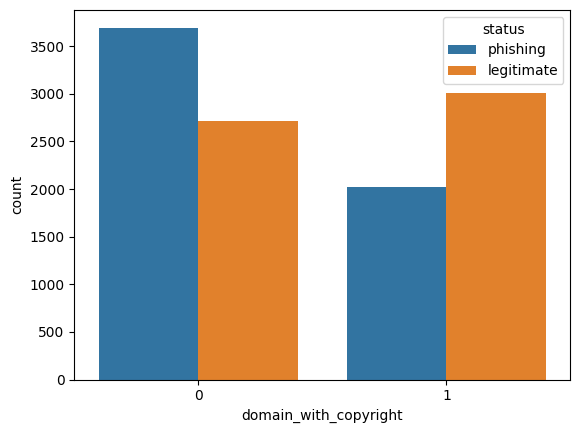

In [3]:
sns.countplot(data=df,x='domain_with_copyright',hue='status')

<Axes: xlabel='page_rank', ylabel='Count'>

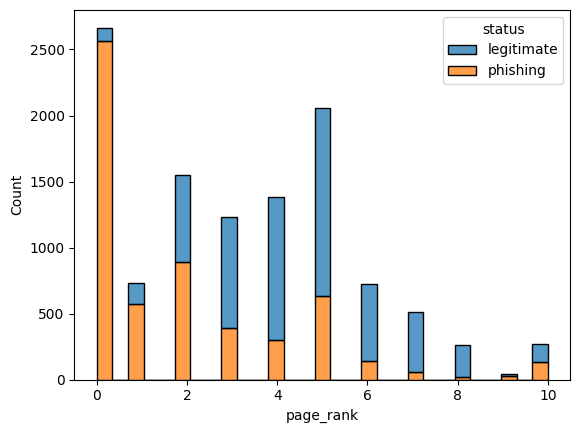

In [4]:
sns.histplot(data=df,x='page_rank',hue='status',multiple='stack') 

In [5]:
for col in ["url","length_url","length_hostname","ip","nb_dots","nb_hyphens","nb_at","nb_qm","nb_and","nb_or","nb_eq","nb_underscore","nb_tilde","nb_percent","nb_slash","nb_star","nb_colon","nb_comma","nb_semicolumn","nb_dollar","nb_space","nb_www","nb_com","nb_dslash","http_in_path","https_token","ratio_digits_url","ratio_digits_host","punycode","port","tld_in_path","tld_in_subdomain","abnormal_subdomain","nb_subdomains","prefix_suffix","random_domain","shortening_service","path_extension","nb_redirection","nb_external_redirection","length_words_raw","char_repeat","shortest_words_raw","shortest_word_host","shortest_word_path","longest_words_raw","longest_word_host","longest_word_path","avg_words_raw","avg_word_host","avg_word_path","phish_hints","domain_in_brand","brand_in_subdomain","brand_in_path","suspecious_tld","statistical_report","nb_hyperlinks","ratio_intHyperlinks","ratio_extHyperlinks","ratio_nullHyperlinks","nb_extCSS","ratio_intRedirection","ratio_extRedirection","ratio_intErrors","ratio_extErrors","login_form","external_favicon","links_in_tags","submit_email","ratio_intMedia","ratio_extMedia","sfh","iframe","popup_window","safe_anchor","onmouseover","right_clic","empty_title","domain_in_title","domain_with_copyright","whois_registered_domain","domain_registration_length","domain_age","web_traffic","dns_record","google_index","page_rank","status"]:
    unique_vals = list(df[col].unique())
    for idx in range(len(unique_vals)):
        df[col]=df[col].replace([unique_vals[idx]],idx) #remember to put [uni..[],idx]
df.shape

/tmp/ipykernel_2072/2684805105.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace([unique_vals[idx]],idx) #remember to put [uni..[],idx]


(11430, 89)

In [6]:
df.dtypes

url                int64
length_url         int64
length_hostname    int64
ip                 int64
nb_dots            int64
                   ...  
web_traffic        int64
dns_record         int64
google_index       int64
page_rank          int64
status             int64
Length: 89, dtype: object

In [7]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

status
0    5715
1    5715
Name: count, dtype: int64


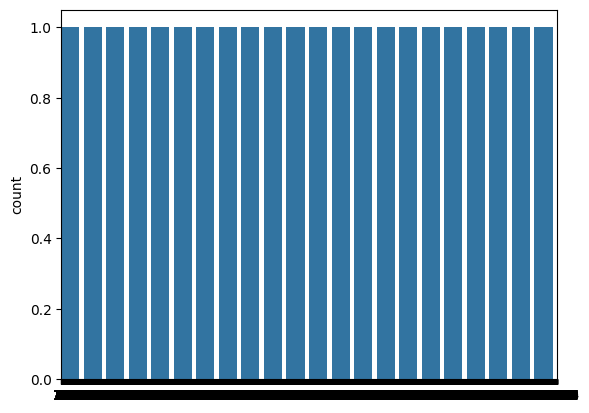

In [8]:
sns.countplot(df.status)
print(df.status.value_counts())

<Axes: xlabel='length_url'>

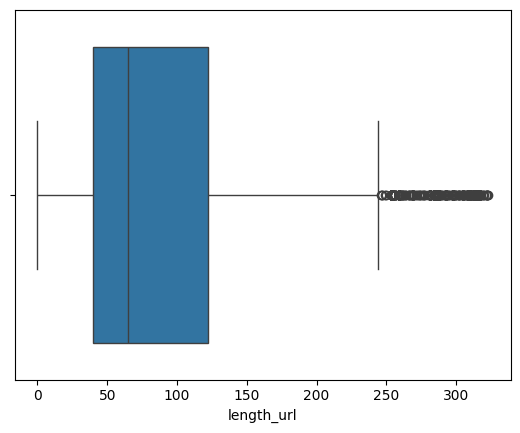

In [9]:
sns.boxplot(x=df["length_url"])

In [12]:
z = np.abs(stats.zscore(df))
data_clean = df[(z<3)]
data_clean.shape

/tmp/ipykernel_2072/3878538554.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z = np.abs(stats.zscore(df))


(890529, 89)

<Axes: >

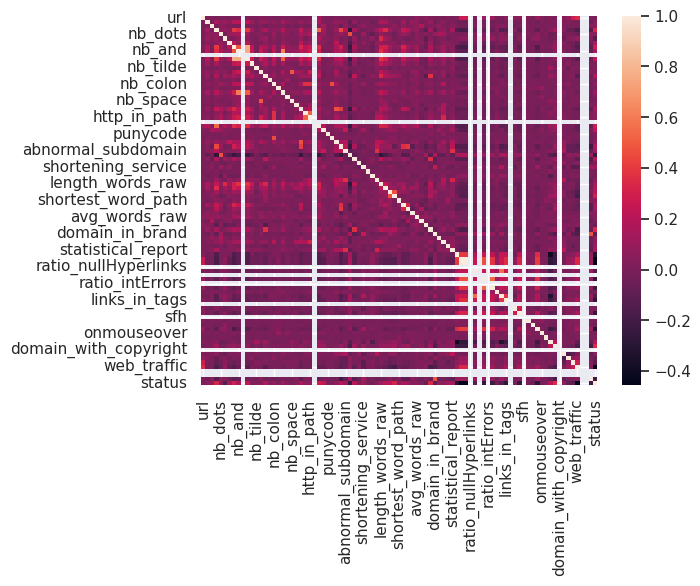

In [13]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [14]:
x=df.drop('status',axis=1)
y=df.status

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # ensures same set of data is used for splitting

In [16]:
def ModelEval(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train) #used to train the model using the training dataset
    y_pred=model.predict(x_test) # Uses the trained model to predict the target values for the test data.
    print("Accuracy Score: ",round(accuracy_score(y_test,y_pred)*100,2),"%") # Overall, how many predictions were correct
    print("F1-Score: ",f1_score(y_test,y_pred)) # Harmonic mean of precision and recall.Best when you want balance between precision and recall(for imbalanced datasets)
    print("Precision Score: ",precision_score(y_test,y_pred)) # Out of the predicted positives, how many were actually positive
    print("Recall Score: ",recall_score(y_test,y_pred)) # Out of the actual positives how many were correctly predicted
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
    all_sample_title= "Accuracy Score: {0}".format(model.score(x_test, y_test)*100)
    plt.title(all_sample_title,fontsize=12)
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label')
    plt.show()

Accuracy Score:  93.61 %
F1-Score:  0.9349376114081996
Precision Score:  0.9424977538185085
Recall Score:  0.9274977895667551


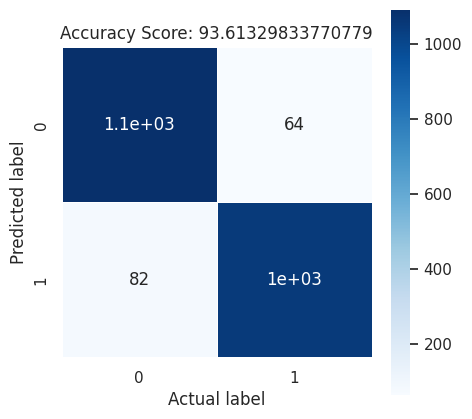

In [17]:
rfc = RandomForestClassifier(random_state=0)
ModelEval(rfc,x_train,x_test,y_train,y_test)

Accuracy Score:  81.45 %
F1-Score:  0.8118899733806566
Precision Score:  0.8147818343722173
Recall Score:  0.8090185676392573


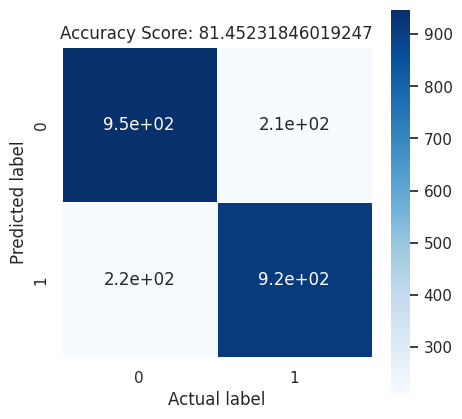

In [18]:
knn = KNeighborsClassifier() #no random_state=0
ModelEval(knn,x_train,x_test,y_train,y_test)

Accuracy Score:  88.41 %
F1-Score:  0.8831054256726952
Precision Score:  0.8811619718309859
Recall Score:  0.8850574712643678


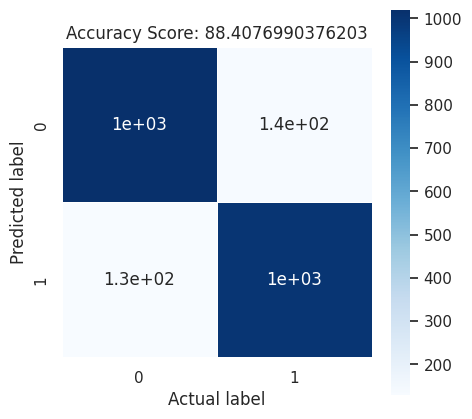

In [19]:
ada = AdaBoostClassifier(random_state=0)
ModelEval(ada,x_train,x_test,y_train,y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  82.41 %
F1-Score:  0.8221238938053097
Precision Score:  0.8228520814880426
Recall Score:  0.8213969938107869


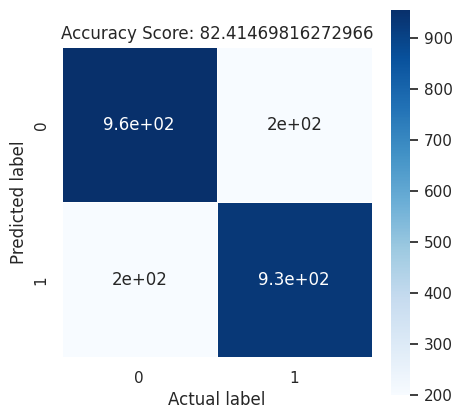

In [20]:
lr = LogisticRegression(random_state = 0)
ModelEval(lr,x_train,x_test,y_train,y_test)

Accuracy Score:  88.45 %
F1-Score:  0.8840070298769771
Precision Score:  0.8786026200873363
Recall Score:  0.8894783377541998


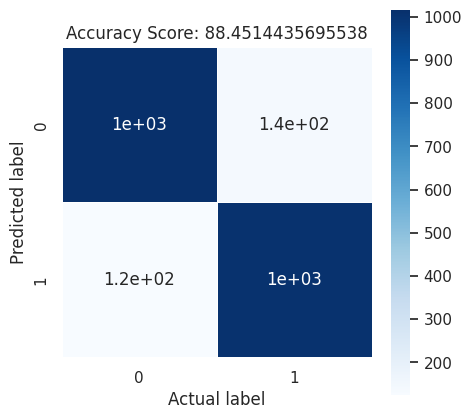

In [21]:
dtree=DecisionTreeClassifier(random_state=0) # random_state=0 ensures the trees are built the same way each time 
ModelEval(dtree,x_train,x_test,y_train,y_test)